#Computer Assignment (CA) No. 10: Hypothesis Testing

## Problem Statement
This assignment is designed to introduce you to hypothesis testing. You will essentially build a computer simulation of Example 9.9 in the textbook:
####Example 9.9:
The mean lifetime E[X] of the light bulbs produced by Lighting Systems Corporation is 1570 hours with a standard deviation of 120 hours. The president of the company claims that a new production process has led to an increase in the mean lifetimes of the light bulbs. If Joe tested 100 light bulbs made from the new production process and found that their mean lifetime is 1600 hours, test the hypothesis that E[X] is not equal to 1570 hours.
####The tasks to be accomplished are:
1. Create a function that generates n Gaussian distributed random variables:
*X = gen_grv(mean, stdev, n)*
2. Compute the mean of X, .
3. Create a function that tests whether the difference between the true mean and the estimated mean are statistically significant: *status = check_significance(mean1, mean2, stdev, n, confidence)*
4. Create a function that determines the value of N for the difference between two means to be statistically significant:
*N = determine_significance(mean1, mean2, stdev, confidence)*

####Now, put this all together by doing the following:
1. Generate n random numbers with a mean of 1600 hours and a stdev of 120 hours for n = 10, 100, 1000.
2. Using your tools above, determine if the difference in the mean is significant for confidence levels of 0.8, 0.9, 0.95, 0.99, 0.999.
3. Determine the minimum value of n for which these differences would be statistically significant.
4. Repeat no. 2 for a standard deviation of 240 hours.
5. Find the maximum value of the variance for which the difference in the mean is significant for [n = 10, 100, 1000] and [confidence = 0.8, 0.9, 0.95, 0.99, 0.999].



## Approach and Results 

###  A Quick Examination of Hypothesis Testing 

Because I definitly sucked at it on the test.
#### Z-Score 
The $Z$ score, otherwise known as the standard score, is the "number of standard deviations an observation or datum is above the mean." Thus can be defined as 

$$ z = \frac{x-\mu}{\sigma} $$ 
where: $\mu$ is the mean of the population $x$ is a sample, and $\sigma$ is the standard deviation of the population. 

This can also be applied to a random variable $X$ or a sample mean $\bar{X}$, such that 
$ \bar{X} = \frac{1}{n}\sum_{i=1}^n X_i $. The $Z$ score of the sample mean is equal to 

$$ Z = \frac{\bar{X} - E[X]}{\sigma_X/\sqrt{n}}.$$ 

where $n$ is the number of samples in $\bar{X}$, $E[X]$ is the mean of the distribution of $X$ which we will denote as $\mu_X$, and the standard deviation of the sample mean is $\sigma_{\bar{X}} = \sigma_X/\sqrt{n}$. 

#### Confidence Limiits 
<img src="limits.png">

If $\Phi()$ represents the CDF of the normal distribution and we are attempting to locate the limits the graph (taken from the class text) for a two tail test!

$$ P(-z_\alpha \le Z \le z_\alpha) = 1 - \alpha $$

Subsitutn' the expression for $Z$ above for a sample mean, 

$$ \Phi(z_\alpha) = P(Z \le z) = 1 - \alpha/2 $$

$$ z_\alpha = \Phi^{-1}(\Phi(z)) = \Phi^{-1}(1-\alpha/2)$$

$$ P(\bar{X}-z_\alpha\frac{\sigma}{\sqrt{n}} \le \mu_x  \le \bar{X}+z_\alpha\frac{\sigma}{\sqrt{n}}) = 1- \alpha $$

thus, the endpoints of the confidence interval are $= \bar{X} \pm \Phi^{-1}(1-\alpha/2)\frac{\sigma_X}{\sqrt{n}}$

#### Process of Hypothesis Testing 
1. Determine $H_0$ and $H_1$ 
2. Specify $\alpha$ the level of siginficance, which is the probability the sample means are different enough to reject $H_0$. 
3. Calculate the test value $z$, or the standard score of the test value based on the collected data. 
4. Find the confidence limits or $z_\alpha$ given $\alpha$ 
5. Reject or accept $H_0$ 

Thus, the rejection region is the region that lies outside the confidence interval; the confidence interval is the acceptance region. $H_0$ is accepted if $z$ lies in the acceptance region and it is rejected if $z$ lies in the rejection region.

If $H_0$ is with within the confidence interval can be discovered in two ways. For the first method, the random variable under test is normalized and if it is within $\pm z_\alpha$, $H_0$ is accepted. For the second method, the confidence limits are found by "de-normalizing" $\pm z_\alpha$ and determining if the distribution's mean $\mu_X$ is within the interval. 


### Functions: gen_grv, check_significance, and determine_significance

#### gen_grv()

In [2]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


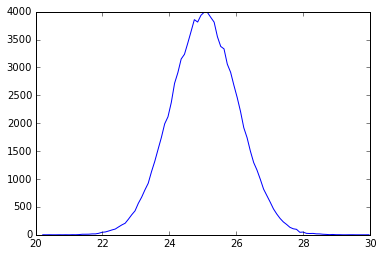

In [3]:
def gen_grv(mean, stdev, n):
    '''
        Generates n Gaussian random variables 
    '''
    X = random.normal(mean, stdev, n) 
    return X 

# TESTING 
x = gen_grv(25, 1, 100000) 
h = histogram(x, bins=100)
plot(h[1][1:], h[0]) 

Generating a vector $X$ consising of 100,000 random variables which are normally distributed with a mean of 25 and a $\sigma$ 0f 1 produces the figure above which appears consistant with a normal distribution. 

#### check_significance

The function utilizes the first method described above. The function returns true if $H_0$ is accepted and false if $H_0$ is rejected. The function is tested with the example provided in the problem statement. 

In [5]:
def check_significance(mean1, mean2, stdev, n, confidence): 
    '''
        Preforms hypothesis test
        mean1 = the mean under test
        returns true when h_0 is accepted
                false when h_0 is rejected
    '''
    # normalize tested mean .... or z-score? 
    Z = (mean1 - mean2)/(stdev/sqrt(n))
    
    # calculated x values of normal distribution which form the limits of a confidence interval 
    a = 1.-confidence
    z = norm.ppf(1 - a/2) 
    return  ((Z >= -z) and (Z <= z))

## Testing 
mean1 = 1600
mean2 = 1570
stdev = 120
n = 100
confidence = [0.99, 0.95] 
for c in confidence:
    print c, check_significance(mean1, mean2, stdev, n, c)     

0.99 True
0.95 False


For the $0.99\%$ confidence rating or a significance level $0.01$, the hypothesis $H_0: \mu_x = \mu_x$ is confirmed. For the $0.095\%$ conidence rating or a significance level $0.05$, the hypothesis $
H_0$ is rejected and $H_1$ stating the mean is significantly differenent is accepted.  

#### determine_significance
If the expression for a confidence interval is decomposed into a system of equations such that, 

$$ \mu_x \ge \bar{X} - z_\alpha\frac{\sigma_X}{\sqrt{n}} $$

$$ \mu_x \le \bar{X} + z_\alpha\frac{\sigma_X}{\sqrt{n}}, $$

and the equation are individually solved for $n$ they both return the same answer, 

$$ n \le \left( \frac{z_\alpha\sigma_X}{\mu_X  -\bar{X}} \right)^2 .$$

If $n$ is not an integer, it of course will have to be rounded. The value of $n$ derived from the equation above will denote the maximum number of samples the test value will still satisfy the current confidence level. As the requirements for the function requested value of $n$ which concludes the difference between the two means to be significantly different $n$ is rounded up as can be seen in the function below.


In [13]:
def determine_significance(mean1, mean2, stdev, confidence): 
    ''' 
        Description: Calculated the minimum value of n which would fit mean1 within  the confidence interval for 
        normal distribution of mean2 and stdev
    '''
    # find the normalized confidence limits
    a = 1 - confidence
    z_u = norm.ppf(1. - a/2) # inverse normal distribution 
    z_l = -z_u
    n = (z_u*stdev/(mean2 - mean1))**2
    return ceil(n) 

# TESTING 
mean1 = 1600 
mean2 = 1570 
stdev = 120 
n = 100 
confidence = [0.99, 0.95]
for c in confidence: 
    new_n = determine_significance(mean1, mean2, stdev, c)
    print "Confidence, New N, Sig Check, Old N, Sig Check"
    # Change new_n below
    print c, new_n, check_significance(mean1, mean2, stdev, new_n-1, c), n, \
    check_significance(mean1, mean2, stdev, n, c)
    
    
    

Confidence, New N, Sig Check, Old N, Sig Check
0.99 107.0 True 100 True
Confidence, New N, Sig Check, Old N, Sig Check
0.95 62.0 True 100 False


The function is tested on the example in the problem statement again. If new_n is decremented after the commented line above, you can see the significance test will accept $H_0$.

### Tasks 1 to 4
1. Generate n random numbers with a mean of 1600 hours and a stdev of 120 hours for n = 10, 100, 1000.
2. Using your tools above, determine if the difference in the mean is significant for confidence levels of 0.8, 0.9, 0.95, 0.99, 0.999.
3. Determine the minimum value of n for which these differences would be statistically significant.
4. Repeat no. 2 for a standard deviation of 240 hours.
5. Find the maximum value of the variance for which the difference in the mean is significant for [n = 10, 100, 1000] and [confidence = 0.8, 0.9, 0.95, 0.99, 0.999].




In [62]:
C = [0.8, 0.9, 0.95, 0.99, 0.999]
N = [10, 100, 1000]
S = [120, 240]
mean2 = 1600 # true mean ...true, true mean. hint: cloud atlys

'''
    DO EVERYTHING AT ONCE BECAUSE THERE IS SO MANY ASSIGNMENTS 
    Loop runs through parameters listed above utilizing functions generated. 
'''

for s in S:
    print "Sigma = %d" %s
    print "==============================================="
    for n in N:
        x = gen_grv(mean2, s, n) # generate n random variables
        print "The number of samples: %d,   H_0,   n required" %n 
        print "-----------------------------------------------"
        for c in C: 
             print "The confidence level: %.3f  %s     %d" %(c, check_significance(mean(x), mean2, s, n, c), \
                                                         determine_significance(mean(x), mean2, s, c))
        print "\n"
    print "==============================================\n"

Sigma = 120
The number of samples: 10,   H_0,   n required
-----------------------------------------------
The confidence level: 0.800  True     30
The confidence level: 0.900  True     49
The confidence level: 0.950  True     69
The confidence level: 0.990  True     119
The confidence level: 0.999  True     193


The number of samples: 100,   H_0,   n required
-----------------------------------------------
The confidence level: 0.800  True     449
The confidence level: 0.900  True     739
The confidence level: 0.950  True     1049
The confidence level: 0.990  True     1812
The confidence level: 0.999  True     2957


The number of samples: 1000,   H_0,   n required
-----------------------------------------------
The confidence level: 0.800  True     2357
The confidence level: 0.900  True     3883
The confidence level: 0.950  True     5512
The confidence level: 0.990  True     9521
The confidence level: 0.999  True     15536



Sigma = 240
The number of samples: 10,   H_0,   n require

### Task 5 
This task is best solved with some math and a litte bit of funcccctions. Starting with the same system of equations derived for the generation of check_significance, 

$$ \mu_x \ge \bar{X} - z_\alpha\frac{\sigma_X}{\sqrt{n}} $$

$$ \mu_x \le \bar{X} + z_\alpha\frac{\sigma_X}{\sqrt{n}}, $$

and isolated for $\sigma_X$ yields again an identical expression, 

$$\sqrt{n}\frac{\mu_X - \bar{X}}{z_\alpha} \le \sigma_{X}.$$ 

Boom! An expression for $\sigma_X$ which illustrates the required value given the $n$, $\mu_x$ and $\bar{X}$. Functionizing, combining with the ridiculus for-loop above and one questionable table layout follows. 


In [76]:
def find_sigma(mean1, mean2, n, confidence):
    '''
        find_sigma 
        ==========
        Determines the std. dev required for $H_0$ to fail. 
        
        mean1: tested mean 
        mean2: distribution mena 
        n: # of samples 
        confidence: the confidence level (WHATEVER THAT MEANS)
    '''
    a = 1. - confidence
    z_a = norm.ppf(1. - a/2)
    sigma = sqrt(n)*(mean2 - mean1)/z_a
    return abs(sigma)

C = [0.8, 0.9, 0.95, 0.99, 0.999]
N = [10, 100, 1000]
mean2 = 1600 # true mean ...true, true mean. hint: cloud atlys

'''
    DO EVERYTHING AT ONCE BECAUSE THERE IS SO MANY ASSIGNMENTS 
    Loop runs through parameters listed above utilizing functions generated. 
'''
for s in S:
    print "Sigma = %d" %s
    print "==============================================="
    for n in N:
        x = gen_grv(mean2, s, n) # generate n random variables
        print "The number of samples: %d,  H_0,  n required,  sigma required" %n 
        print "----------------------------------------------------------------"
        for c in C: 
             print "The confidence level: %.3f,  %s,  %d, %.3f" %(c, check_significance(mean(x), mean2, s, n, c), \
                    determine_significance(mean(x), mean2, s, c), find_sigma(mean(x), mean2, n, c))
        print "\n"
    print "==============================================\n"


Sigma = 120
The number of samples: 10,  H_0,  n required,  sigma required
----------------------------------------------------------------
The confidence level: 0.800,  True,  2049, 8.385
The confidence level: 0.900,  True,  3375, 6.533
The confidence level: 0.950,  True,  4791, 5.482
The confidence level: 0.990,  True,  8275, 4.172
The confidence level: 0.999,  True,  13504, 3.266


The number of samples: 100,  H_0,  n required,  sigma required
----------------------------------------------------------------
The confidence level: 0.800,  False,  55, 162.699
The confidence level: 0.900,  False,  90, 126.764
The confidence level: 0.950,  True,  128, 106.383
The confidence level: 0.990,  True,  220, 80.948
The confidence level: 0.999,  True,  359, 63.366


The number of samples: 1000,  H_0,  n required,  sigma required
----------------------------------------------------------------
The confidence level: 0.800,  True,  12491, 33.954
The confidence level: 0.900,  True,  20576, 26.455
The 

## Conclusions